<a href="https://colab.research.google.com/github/amzker/Amzux/blob/master/2_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import dill
from sklearn.metrics import mean_squared_error as msse

In [182]:
!pip install dill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 3.6 MB/s eta 0:00:00


In [288]:
data = pd.read_csv("https://github.com/ageron/data/raw/main/lifesat/lifesat.csv")

In [289]:
data.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [290]:
data.rename(columns={"GDP per capita (USD)":"GDP","Life satisfaction":"life"},inplace=True)

In [291]:
data.head()

,Country,GDP,life
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='GDP', ylabel='life'>

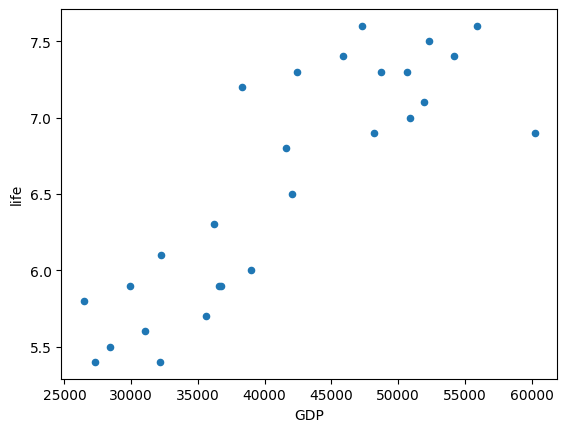

In [292]:
data.plot(x="GDP",y="life",kind="scatter")

In [39]:
x = data["GDP"].values
y = data["life"].values

# Linear Regression Formulae

## Simple Linear Regression

### Linear Equation

The linear equation for simple linear regression is given by:

```
y = m*x + c
```

where `y` is the dependent variable, `x` is the independent variable, `m` is the slope of the regression line, and `c` is the intercept of the regression line.

### Slope

The slope of the regression line can be calculated using the formula:

```
m = (n * Σ(x*y) - Σ(x) * Σ(y)) / (n * Σ(x^2) - (Σ(x))^2)
```

where `n` is the number of observations, `x` and `y` are the independent and dependent variables respectively, `Σ` represents the sum of values, `x*y` represents the product of `x` and `y`, `x^2` represents the squared value of `x`, `x_mean` is the mean of `x`, `y_mean` is the mean of `y`.

### Intercept

The intercept of the regression line can be calculated using the formula:
```
c = y_mean - m * x_mean
```

where `y_mean` is the mean of the dependent variable `y` and `x_mean` is the mean of the independent variable `x`.

## Multiple Linear Regression

### Linear Equation

The linear equation for multiple linear regression is given by:
```
y = b0 + b1x1 + b2x2 + ... + bn*xn
```

where `y` is the dependent variable, `x1`, `x2`, ..., `xn` are the independent variables, and `b0`, `b1`, `b2`, ..., `bn` are the regression coefficients.

### Regression Coefficients

The regression coefficients can be estimated using the method of least squares, and can be calculated using the formula:
```
b = (X^T * X)^(-1) * X^T * y
```
where `y` is the dependent variable, `x1`, `x2`, ..., `xn` are the independent variables, `b0`, `b1`, `b2`, ..., `bn` are the regression coefficients, `X` is the matrix of independent variables, `X^T` is the transpose of `X`, and `^(-1)` represents the inverse of a matrix.


# y = mx + c method (mathamatical)

In [43]:
data.eval("xy = GDP*life",inplace=True)

In [310]:
class Model:
  def __init__(self):
    self.m = None
    self.c = None

  def train(self, x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    xy = np.sum(x*y)
    xs = np.sum(np.square(x))
    xss = np.square(np.sum(x))
    self.m = ((n*xy)-(np.sum(x)*np.sum(y)))/((n*xs)-xss)
    self.c = y_mean - self.m * x_mean

  def predict(self, x):
    if self.m is None or self.c is None:
        raise ValueError("Model has not been trained yet")
    return self.m*x + self.c

  def evaluate(self, x_test, y_test):
    if self.m is None or self.c is None:
        raise ValueError("Model has not been trained yet")

    y_pred = self.predict(x_test)
    mse = np.mean((y_test - y_pred)**2)
    print("mse: ",mse)

  def reset(self):
    self.m = None
    self.c = None

  def save(self, filename):
    with open(filename, "wb") as f:
        dill.dump(self, f)


In [314]:
model = Model()
model.train(x,y)
model.save("model.dill")

In [315]:
with open("model.dill","rb") as f:
  modelw = dill.load(f)

In [316]:
modelw.evaluate(x,y)

mse:  0.15394596065527685


In [283]:
model.reset()
model.predict(22)

ValueError: ignored

In [284]:
## sklearn model

In [296]:
smodel = LinearRegression()
xx = data[["GDP"]].values
yy = data[["life"]].values
smodel.fit(xx,yy)

LinearRegression()

In [322]:
X_new = [[37_655.2]] 
print(smodel.predict(X_new))
print(model.predict(37655.2))

[[6.30165767]]
6.301657665080484


In [328]:
print("sklearn mse:", msse(yy,smodel.predict(xx)))
print("my_model mse:", msse(y,model.predict(x)))

sklearn mse: 0.15394596065527694
my_model mse: 0.15394596065527685


In [318]:
eval = pd.DataFrame()
eval["my_model"] = model.predict(y)
eval["sklearnmodel"] = smodel.predict(yy)
eval

,my_model,sklearnmodel
0,3.749443,3.749443
1,3.749415,3.749415
2,3.749422,3.749422
3,3.749449,3.749449
4,3.749429,3.749429
5,3.749415,3.749415
6,3.749463,3.749463
7,3.749436,3.749436
8,3.749476,3.749476
9,3.749449,3.749449


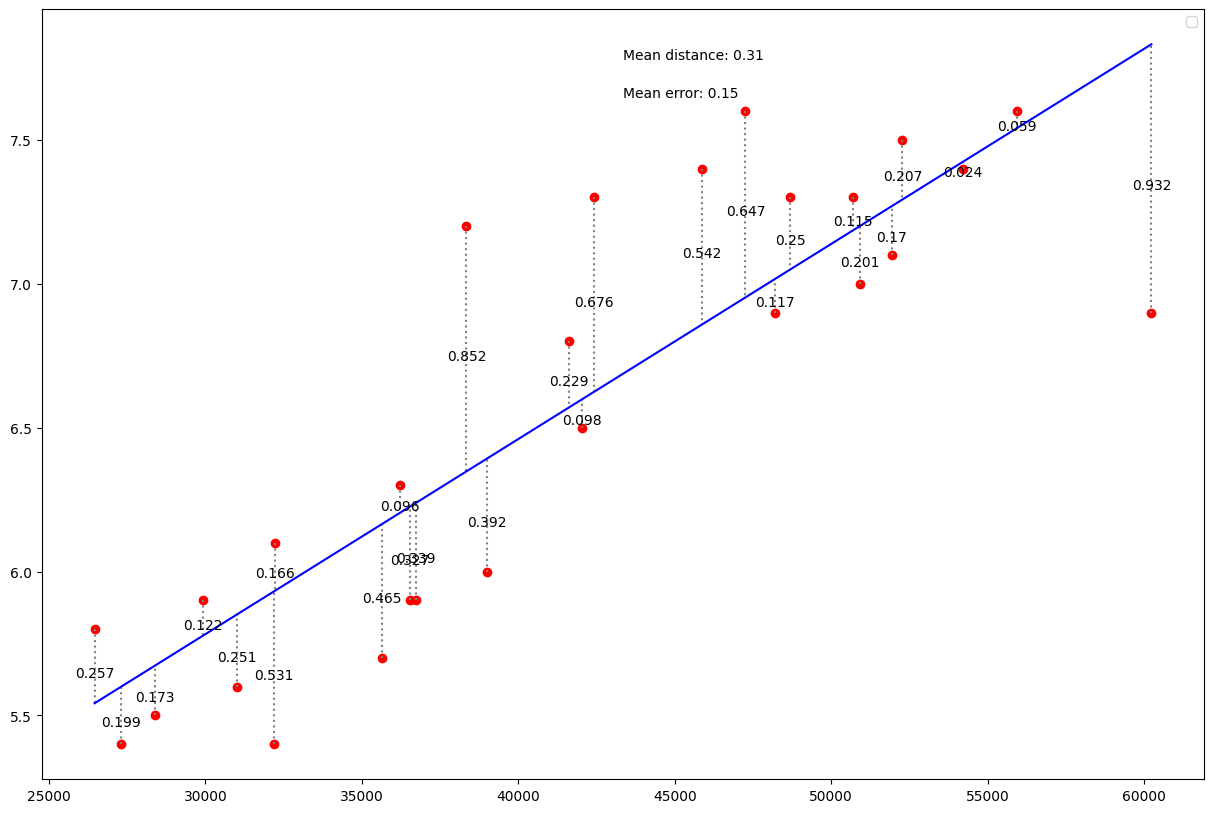

In [143]:
distances = []
errors = []
for i in range(len(x)):
    distance = np.round(abs(eq[i] - y[i]),3)
    distances.append(distance)
    error = (eq[i] - y[i])**2
    errors.append(error)

# Plot the data and best fit line with distance labels
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], eq[i]], color="gray", linestyle="dotted")
    ax.text(x[i], (y[i]+eq[i])/2, f"{distances[i]}", ha="center", va="top")

ax.scatter(x, y, color="red")
ax.plot(x, eq, color="blue")

# Calculate mean distance and error
mean_distance = np.mean(distances)
mean_error = np.mean(errors)

# Display mean distance and error
ax.text(0.5, 0.95, f"Mean distance: {mean_distance:.2f}", transform=ax.transAxes, fontsize=10, verticalalignment="top")
ax.text(0.5, 0.90, f"Mean error: {mean_error:.2f}", transform=ax.transAxes, fontsize=10, verticalalignment="top")

# Add legend to the plot
ax.legend()

# Show the plot
plt.show()

# Gredient method